# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_extra_ratio'
time_path = 'data/time/compare_extra_ratio_2020_12_13_23_26_56.npy'
cost_path = 'data/cost/compare_extra_ratio_2020_12_13_23_26_56.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.linspace(0, 1, num=11)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(33,) (33,)
Wall time: 8.97 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(11, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      11 non-null     float64
 1   approx      11 non-null     float64
 2   approx_woc  11 non-null     float64
 3   size        11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000000,0.549235,0.029045,0.0
1,0.000000,0.594008,0.031177,0.1
2,0.000100,0.595027,0.037295,0.2
3,0.000100,0.632041,0.045141,0.3
4,0.000000,0.662035,0.055452,0.4
5,0.000104,0.642279,0.067574,0.5
6,0.000099,0.667491,0.076005,0.6
7,0.000000,0.679244,0.081321,0.7
8,0.000000,0.712358,0.086783,0.8
9,0.000000,0.672469,0.089219,0.9


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(11, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      11 non-null     float64
 1   approx      11 non-null     float64
 2   approx_woc  11 non-null     float64
 3   size        11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None


,greedy,approx,approx_woc,size
0,11158.3,9909.5,9819.9,0.0
1,11158.3,9364.5,9495.9,0.1
2,11158.3,9119.1,9389.5,0.2
3,11158.3,8996.9,9367.9,0.3
4,11158.3,8959.2,9367.9,0.4
5,11158.3,8931.2,9340.2,0.5
6,11158.3,8902.6,9339.0,0.6
7,11158.3,8846.0,9336.5,0.7
8,11158.3,8846.0,9336.5,0.8
9,11158.3,8846.0,9336.5,0.9


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy        0.000037
approx        0.646798
approx_woc    0.062356
size          0.500000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,11158.3,9909.5,9819.9,0.0,1.126020,1.136295
1,11158.3,9364.5,9495.9,0.1,1.191553,1.175065
2,11158.3,9119.1,9389.5,0.2,1.223619,1.188381
3,11158.3,8996.9,9367.9,0.3,1.240238,1.191121
4,11158.3,8959.2,9367.9,0.4,1.245457,1.191121
5,11158.3,8931.2,9340.2,0.5,1.249362,1.194653
6,11158.3,8902.6,9339.0,0.6,1.253375,1.194807
7,11158.3,8846.0,9336.5,0.7,1.261395,1.195127
8,11158.3,8846.0,9336.5,0.8,1.261395,1.195127
9,11158.3,8846.0,9336.5,0.9,1.261395,1.195127


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.234110
approx_woc_gain    1.186541
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        11158.300000
approx         9051.545455
approx_woc     9406.027273
dtype: float64

# Plots

## Processing time

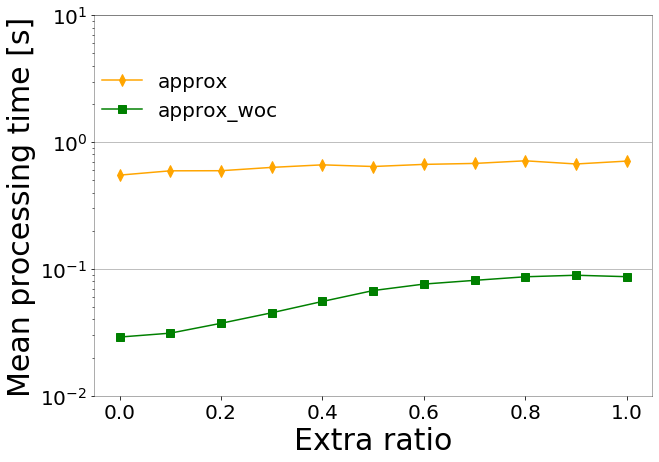

In [10]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**1), 
    xlabel='Extra ratio',
    legend_loc=(0, 0.7)
)

## Travel cost

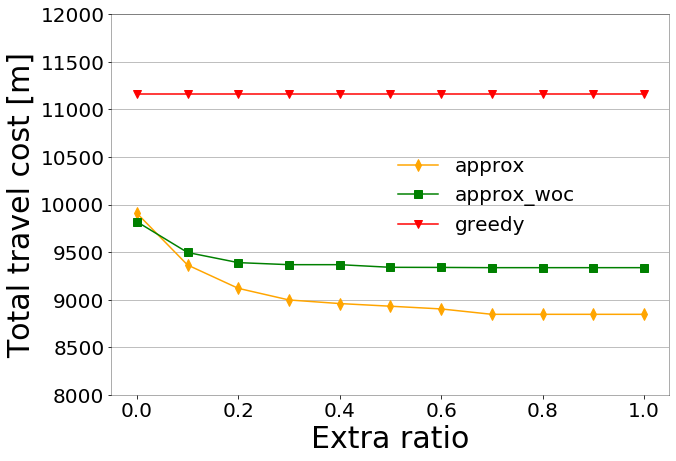

In [11]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(8000,12000), 
    xlabel='Extra ratio',
    legend_loc=(0.5, 0.4)
)

## Ride-sharing efficiency

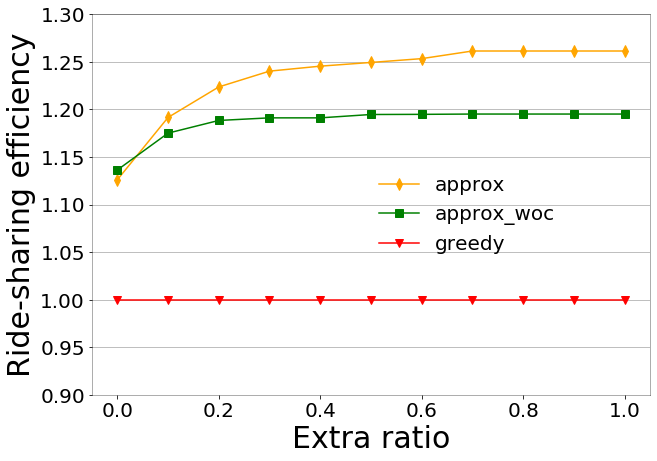

In [13]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(0.9,1.3), 
    xlabel='Extra ratio',
    legend_loc=(0.5, 0.35)
)